In [ ]:
#逻辑回归案例，实现机器学习的模型.
#任务：两门成绩，看能不能被学校录取。二分类的问题。

In [59]:
#【第一步引库。首先导三大件，np,pd,plt】
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#上面这行给jupyternotebook用的，用于画图时显示在编辑器里？类似的。其它编辑器可去掉
from pylab import *#【引入支持中文标签的包】
plt.rcParams['font.sans-serif'] = ['SimHei']#【支持轴标签中文处理】
plt.rcParams['axes.unicode_minus'] = False#支持轴标签负号

In [60]:
#【第二步，看下数据前几条，再看下shape 行列】
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
#os.sep是 跨平台文件路径符， linux / windows 相反
pdData = pd.read_csv(path, header = None, names = ['exam1','exam2','admitted'])
#header = None，header不占位，txt文件中数据头没有，不加这行，第一行文字就会去做标题，后面指定列名。
pdData.head()


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
pdData.shape

(100, 3)

Text(0,0.5,'exam2分数')

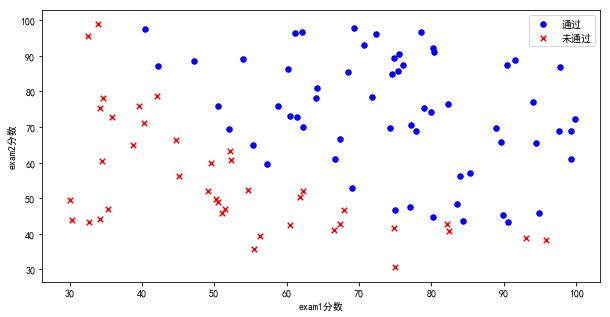

In [4]:
#【第二步.2，画出来看下】
fig,ax = plt.subplots(figsize=(10,5))
'''
#全部成绩画散点图
ax.scatter(pdData['exam1'],pdData['exam2'], s=30,c='b',marker='o', label = '成绩')#s 点的大小，c颜色,marker形状点o星x，label 标签，可直接传参
ax.legend()
ax.set_xlabel('分数')
'''
#把允许和不允许分开画
#注意下面，不是用判断选哪个addmitted是1,哪个是0
#直接用series,序列，把addmintted为1或0当做过滤条件
positive = pdData[pdData['admitted']==1]
#print(positive) #经查看这样就分出了，admitted为1的所有pdData数据子集
negative = pdData[pdData['admitted']==0]
#print(negative)
ax.scatter(positive['exam1'],positive['exam2'],s=30,c='b',marker='o',label='通过')#前两个参数x,y轴，两点确定一个坐标
ax.scatter(negative['exam1'],negative['exam2'],s=30,c='r',marker='x',label='未通过')#由两部分图可知，没通过的两科成绩都低。在左下角，有明显分界
ax.legend()
ax.set_xlabel('exam1分数')
ax.set_ylabel('exam2分数')


sigmoid预测函数：将输入值转为概率
$$g(z)=\frac{1}{1+e^{-z}}$$


In [61]:
#【第三步：定义sigmoid预测函数】
def sigmoid(z):
    return 1/(1+np.exp(-z))#注意分母加括号


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01]


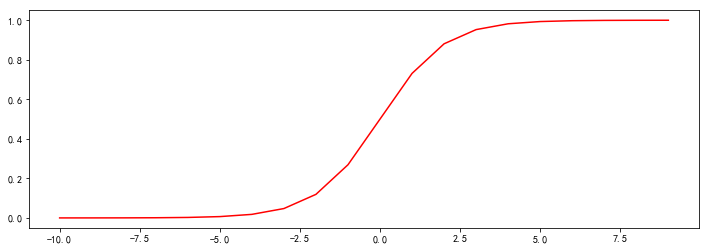

In [6]:
#画出来看下
nums = np.arange(-10,10,step=1)
print(nums)
print(sigmoid(nums))
#fig,ax = figure(figsize=(12,4))
fig,ax = plt.subplots(figsize=(12,4))#注意前面是plt.subplots,画曲线，温习下plt
ax.plot(nums, sigmoid(nums),'r')#x轴是上面生成的一组实数，y轴是它的sigmoid函数返回值,r是红色
#看图可知函数定义没问题，是输入一组实数得到0到1之间的概率曲线（因为永远是输出0到1之间，无论输入一组什么数，所以可以用来统计概率0%到100%的可能性）
#它的值，有几个特点：g:R ->[0,1]输入一组实数，得到一个0到1之间的数；g(0) = 0.5，输入0时得到概率值为0.5；输入-无穷时输出接近0；输入+无穷时输出接近1


In [62]:
#【第四步：用model函数 组合数据样本和参数输入sigmoid 函数，返回预测概率值，这一步由单纯输入数据和参数，间接（通过sigmoid函数计算）映射到了概率值
#这是组合数据和参数向sigmoid传递的一个中间函数。也可把数据参数组合以后直接传上面一个z的位置中，那样看着不清晰独立】
def model(X,theta):#X是我的样本数，theta是参数
    #数据样本和参数的组合方式，是每个数据与对应参数（影响因子）组合乘再累加求和，就是我们想要的一个数据相互影响最终求影响度的关系。
    #上面一一遍历乘再累加，可以简化为样本与参数的矩阵乘，因矩阵乘是行*列，所以有一个要转置。.T.另外,theta0需要补加一个x0=1的项。作偏置项。
    #见 八/003.png或下图
    return sigmoid(np.dot(X,theta.T))#np.dot是矩阵乘，乘数和被乘数分别为我的样本组合矩阵，我的参数矩阵转置。



$$\begin{array}{ccc}
\begin{pmatrix}\theta_{0}&\theta_{1}&\theta_{2}\end{pmatrix} &\times & \begin{pmatrix}1\\x_{1}\\x_{2}\end{pmatrix}\end{array} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $$

In [63]:
#【第五步：加一列，给偏置项θ0加配一列值为1的样本x0】
'''
pdData=pdData.drop(['Ones'],axis=1)#注意，删除某列后，要赋值回去，旧的数据集才会变，因为删完了会返回一个新的数据集
pdData.head()
'''
if 'Ones' not in pdData.columns:#判断Ones不存在则插入一行，防止多次执行时重复插入报错
    pdData.insert(0,'Ones',1)
    
#pdData.head()
#把dataFrame转换成需要的矩阵格式
orig_data = pdData.as_matrix()
#print(orig_data)#跟原数据行列一致
cols = orig_data.shape[1]#data.shape[0]返回行数，data.shape[1]返回列数
#把X和y分开
X = orig_data[:,0:cols-1]#X为所有数据，去掉最后一列
y = orig_data[:,cols-1:cols]#y为最后一列
theta = np.zeros([1,3])#theta占位（先以0占位），三个参数（可变因子），一行三列，对应三个样本特征。

#查看下
X[:5]

    

G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [64]:
y[:5]


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [65]:
theta


array([[0., 0., 0.]])

In [66]:
X.shape, y.shape, theta.shape#【看到没，可以放在一行，用逗号格开查看】


((100, 3), (100, 1), (1, 3))

损失函数
将对数似然函数去负号

$$D(h_{\theta}(x),y) = -ylog(h_{\theta}(x))-(1-y)log(1-h_{\theta}(x))$$

负号移到上面了，用于转梯度上升为梯度下降

求平均损失

$$J(\theta) = \frac{1}{n}\sum_{i=1}^{n}D(h_{\theta}(x_{i}),y_{i})$$

求和求平均移到下面了，原公式见 八\004.png

In [67]:
#上面数据已经准备好了，下面看看怎么把数据组合得出结果。
#【第六步：损失函数】
#定义cost  传入model预测结果值，根据三列参数，计算损失函数（由考虑二分类整合后的求似然函数即损失函数来计算损失，达到最小）

def cost(X,y,theta):#数据，标签（y值，结果），参数
    #公式第一步 右边分两部分写，
    left = np.multiply(-y, np.log(model(X,theta)))#multiply乘,np.log有公式，log括号里hθ(x)即有关θ和x的求结果公式 model(X,theta)，即sigmoid，自动算预测值 ，算完了再算个log
    right = np.multiply(1-y, np.log(1-model(X,theta)))#注意第一参1-y不用括号括起来
    
    #公式第二步 写完，并return它
    return np.sum(left-right)/(len(X))#这个求和公式是求所有样本和，再求平均(sum(left-right) 就是sumD，因为D = left-right)。不是遍历参数，参数需不需要遍历看左边，J(θ)是一个一个传进来迭代的。



计算梯度

$$\frac{\partial J}{\partial\theta_{j}} = -\frac{1}{m}\sum_{i=1}^{n}(y_{i}-h_{\theta}(x_{i}))x_{ij}$$

partial偏爱的，偏导符号 注意后面编写双下标方式｛ij｝在一起，\partial J中间有空格，不要单词混在一起认不出了
见之前推的最终偏导公式 八\005.png

【遗留问题：求偏导的推导过程查下，或看第1版】


In [68]:
#【第七步：计算梯度】
#【定义 gradient 对上式求偏导数，即对损失求偏导，目的是求一个偏移度用一个步长和新角度再去调整下一步计算新损失，进一步迭代，一步一步达到最优化，这一步是计算每个参数（三列影响因子）在此刻一步的梯度，用于梯度下降迭代。】
def gradient(X,y,theta):
    #定义梯度结构
    grad = np.zeros(theta.shape)#有多少个theta变量，就算出多少个梯度，所以用theta的shape结构构造一样的梯度结构，先全0
    #定义循环体中要迭代的主体 -yi+hθ(xi) 
    item = (model(X, theta)-y).ravel()#ravel把矩阵拉平，变一维，并不产生源数据副本
    #遍历j，每个参数定遍历一篇梯度计算，看公式左边，θj是变的，有j个θ，theta有多少个就有多少次变量，j是θ的拉平了的个列表数
    #【这一刻遍历的计算theta个梯度，不同的时刻是通过迭代调整(在更新参数那一步，注意看后面。theta新参 = theta旧参 - alpha步长学习率*grad角度)完成的】
    for j in range(len(theta.ravel())):#本例中是三个j，theta0，theta1，theta2
        item2 = np.multiply(item, X[:,j])
        #X[:,j] 即 xij 所有X的第j列，当前列，遍历到的那一列。乘 model - y，再看前面这一半，没有变量，只有自身的i个数，通过下面，每次遍历时累加自身来这现。
        grad[0,j] = np.sum(item2)/len(X) #累加求平均得到最终梯度放入梯度变量中。第0行（一维），第j列。每次加入新的j，所有梯度都保留分析画图用。

    return grad #grad就是最终得到的，通过遍历计算的例子中的theta0，theta1，theta2三个变量下的方向，偏导。


#【用这个方向再加上自定的学习率步长就可以去迭代，计算最小损失，最低下降点，即概率分界点。用来判断分类是否被录取。】

    

In [69]:
#【我们还可以定义停止策略（按次数，按损失值，按梯度值）和下降方法（批量，随机，Mini-batch小批量随机），不同的学习率。混用多种方法，得出最佳方案】
#【第八步：应用上面的模块功能函数descent，比对混用各种策略，求最佳解】
#==定义descent下降函数 开始下降（迭代应用前面的）==
#另加是国
#==【八.1 先定义三种不同停止策略切换函数】==
STOP_ITER = 0#第一种按迭代次数停止，规定多少次后停止
STOP_COST = 1#根据损失，损失函数返回值前后没什么变化了。就停止
STOP_GRAD = 2#根据梯度，返回梯度前后变化很小，就停

def stopCriterion(type,value,threshold):#停止类型，值 迭代次数损失量梯度值，threshold 设定的极限阈值
    if type == STOP_ITER:
        return value > threshold 
    #迭代次数大于一定限度，这里返回的是一个条件，发现没，
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold 
    #最后一次迭代的损失值与之前一次之差小于一定限度,abs绝对值，去掉负号
    elif type == STOP_GRAD:
        return LA.norm(value) < threshold
    #np.linalg.norm()求矩阵的范数，把一个事物映射到非负实数。
    

#==【八.2 定义数据洗牌函数】==
#【为什么要定义洗牌函数，每次数据来了以后重新下降的时候要洗下，使泛化更强，顺序打乱，
#做一个乱序的数据，算损失。而在之前在线性回归时就要数据标准化？那个是整体视角的缩放变正太分布
#这里的洗牌是指顺序】
import numpy.random
def shuffleData(data):
    np.random.shuffle(data)
    #洗牌后数据乱了，重新指定成需要的矩阵格式
    cols = data.shape[1]#取列数量
    X = data[:,0:cols-1]#除去最后一列的所有数据组成X
    y = data[:,cols-1:]#最后一列的所有值组成y
    return X,y

In [70]:
#==【八.3 下降主函数descent】==
import time#引入时间，看每种方法耗时情况对比

def descent(data, theta, batchSize, stopType, thresh, alpha):
    #参数：
    #我的数据，参数影响系数，
    #batchSize下降量（为 1 则随机下降，为总样本数则批量下降，一个区间则是Mini-batch小批量梯度下降。
    #停止策略，停止限度域值，alpha学习率步长
    
    #开始梯度下降求解
    #初始化
    init_time = time.time()#当前时间时间戳
    i = 0 #迭代次数
    k = 0 #batch下降量初始化
    X,y = shuffleData(data)#数据洗牌
    grad = np.zeros(theta.shape)#定义梯度结果存放矩阵
    costs = [cost(X,y,theta)]#损失值初始化，算一下原始数据第一次的损失值，放到列表里
    
    while True:
        #算梯度 gradient(X,y,theta)
        grad = gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k += batchSize #相当于一个计算器，上面[k:k+batchSize]从第0次开始到指定的次数，
        #每一次对应的X，y的每一个值都算梯度。次数累加和遍历是这里完成的。
        #每一次的累加影响赋回给角度grad，它才是一个新的角度用于下面更新。历史的也会留下来画到图上。
        #不好理解的话，反向理解下。这里只传一遍X,y，这就不叫迭代了。
        #【可以这样理解：batchSize是1的话，这里就1次，100次的话，当然要0到100，每一次依次遍历都求到。对吧。】
        
        if k >= n:#n是设定的迭代次数，在下面，n=100
            k = 0 #重新归0
            X,y = shuffleData(data) #重新洗牌
        #【参数更新，这一步很关键，相当于从下降的图上往下移调整优化的步骤】
        theta = theta - alpha*grad
        #梯度下降一次就用 原参数（有一组，各更新各的）-学习率步长*新梯度 得到新变化的参数
        #上面可以形象的理解为比如左上的theta减去下降角度*步长，等于移到右下方位置。减等于是抹去，抹去了步长*角度的一个双重影响度。
        costs.append(cost(X,y,theta))#计算新的损失，append到损失列表中，用于画变化图
        
        i = i+1; #迭代次数+1次
        
        if stopType == STOP_ITER:
            value =i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh): break
        #【stopCriterion函数在上面，刚说了，返回值是一个条件，所以这里可以拿来当条件，
        #此方法不错，可借鉴，
        #以前return都是返回一个单个的值，此例中返回了条件，还有返回逗号分割的多变量】
    #thresh是跟据停止策略不同，在参数中手动指定不同的极限域值
    return theta, i-1, costs, grad, time.time() - init_time
#返回一系列参数现状，一个新的结果集，可以用逗号分开，方例比对查看。
#参数：i-1，迭代了i-1次，最后一次跳出了。最后一参当前时间-初始化时间
    


In [71]:
#【第九步 展示结果】
#【九.1处理数据用于画图显示 runExpe】
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #【主要就这步，执行组合到最终的下降函数 取值】
    theta,iter,costs,grad,dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    #return 很多用逗号分开，取时可以同时好几个逗号排列取出
    #以下处理下轴标签名称，先粘答案过来，画出图来形象看，再改自己的
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    #以上名字可以暂时忽略，只是用于显示名字，有时间回头再看
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    #参数：名称，theta，迭代次数，最终损失值，用时
    fig,ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')#x轴是生成损失值个数个实数，y轴损失值
    ax.set_xlabel('迭代次数Iterations')
    ax.set_ylabel('损失值Cost')
    ax.set_title(name.upper()+'误差error与迭代 Iteration')
    return theta


***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 1.48s


array([[-0.00027127,  0.00705232,  0.00376711]])

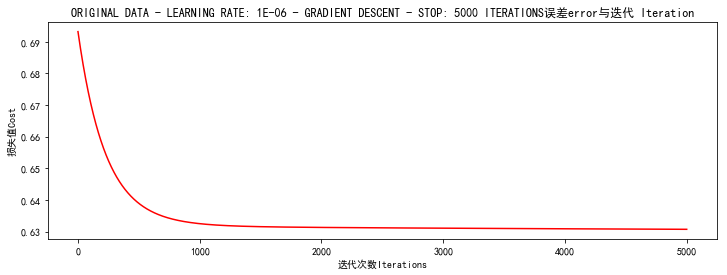

In [72]:
#【九.2 传实参到开始下降画图
#第一种：按迭代次数下降】
n = 100#共100个样本，全部迭代，批量下降
runExpe(orig_data,theta,n,STOP_ITER,thresh =5000, alpha = 0.000001)
#【第十.1步：由图分析：看起来是收敛的，但值最低是0.63,再看看其它方法还能再收敛吗】


***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 33.34s


array([[-5.13364014,  0.04771429,  0.04072397]])

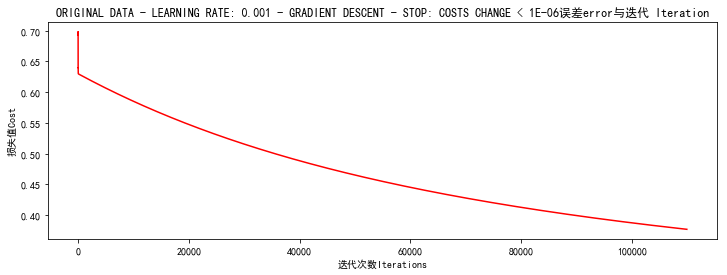

In [28]:
#【九.2 根据损失值停止迭代，传入STOP_COST 和损失极限域值如0.000001即可
#它是根据最后一次和之前的损失差小于这个极限来返回一个条件来设定descent程序break的】

runExpe(orig_data, theta, n, STOP_COST, thresh=0.000001,alpha=0.001)

#【注意上面，theta最开始是空占位，我们要求的就是这个theta，影响参数，
#它选什么才能达到损失值最小
#它的变化有值是通过上在的theta- alpha*grad实现的，自身跟据下降角度和步长调整出来的一些值
#最后拿去做概率评估？什么值时有多大可能录取，什么值有多大可能不录取？
#求它有什么用？后面再看
#***===另外，y是已有的数据允许还是不允许,说白了就是根据输入的成绩看是否允许的概率===***】

#【十.2:分析图，下降到了0.4，说明上图按5000次收敛的远远不够，不要被图蒙蔽了，多试几种，多作几次
#然后最影响结果的还是迭代次数，这个迭代了109901次，用时34.21s,是长了点，还行，数据少】

In [ ]:
#【九.3 根据梯度变化停止】
#设定梯度域值极限0.05，差不多要40000次
runExpe(orig_data,theta,n,STOP_GRAD,thresh=0.05,alpha=0.001)

#【报错：===十.3结果应该是和上面差不多迭代到0.49，先不管了。看下面的===
#G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
#被除数有0
#G:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
#不合法的值相乘了
#】

In [21]:
#print(theta)#这里打印theta还是最初值[[0. 0. 0.]]，
#所以使用不同策略时应该不会互相影响，不用从头开始再执行一遍

[[0. 0. 0.]]


***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.00062328  0.00814821  0.00261754]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.61s


array([[-0.00062328,  0.00814821,  0.00261754]])

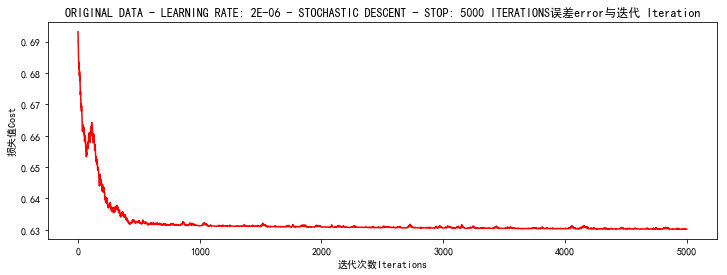

In [29]:
#【九.4 对比不同的梯度下降方法】
runExpe(orig_data,theta,1,STOP_ITER,thresh=5000,alpha=0.000002)
#这个n迭代次数用了1，随机下降，后面用了5000次迭代，学习率步长0.01，看下
#【也报上面两个错，但没影响出结果，回头看下上面是不是时间没到。】
#【十.4 分析 alpha=0.01时忽上忽下，窜的，非常不稳定。这个模型是不会收敛的。
#解决主法是alpha=0.000002改小再看接近收敛了，也是下降到0.63，也不是特别好
#【改完学习率没有上面两个0做被除数报错了，上面改下试试】

***Original data - learning rate: 2e-05 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-0.02089052  0.01078053  0.00076039]] - Iter: 15000 - Last cost: 0.63 - Duration: 2.21s


array([[-0.02089052,  0.01078053,  0.00076039]])

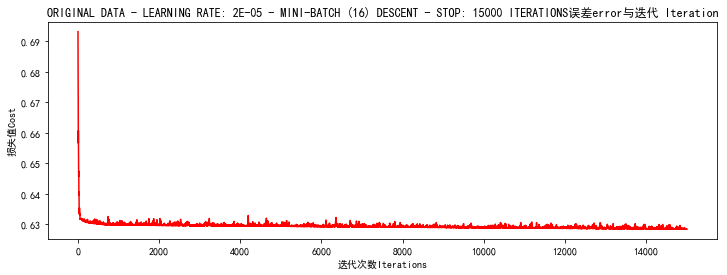

In [25]:
#【九.5 Mini-batch 小批量随机下降】
runExpe(orig_data,theta,16,STOP_ITER, thresh = 15000, alpha=0.001)
#==取16个数 作一个小区间的 下降迭代==
#【十.5 学习率0.01时一样很浮动，不收敛，还有上面两个报错
#改为0.0002时一样没报错了，也接近收敛和上面一样，0.63，
#下面我们尝试另一个方法，对数据进行标准化。
#】

***Scaled data - learning rate: 0.001 - Mini-batch (16) descent - Stop: gradient norm < 0.002
Theta: [[1.1848502  2.87727185 2.6420309 ]] - Iter: 80163 - Last cost: 0.21 - Duration: 16.07s


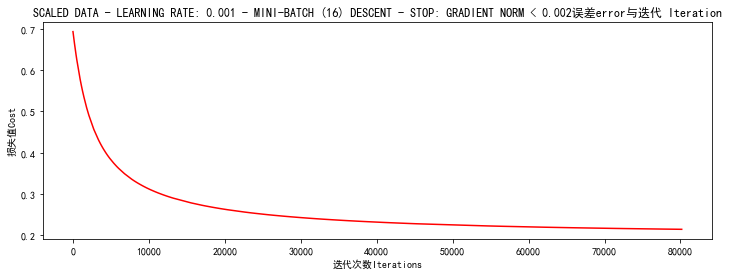

In [77]:
#【#***===计算下降时我们用了乱序，在取结果收敛时我们用标准化，相当于视角上放大缩小视角，正太分布，
#这样就可以少迭代几次，先用标准化框定了一个大的不浮动范围了。和线性回归一样。
#结果要回归收敛模型时需要标准化处理下，计算时乱序较好，泛化更强。===***】

#【九.6 回归之前对数据进行标准化
#相当于对 数据按属性列-其均值/再除其方差，让每列/属性在数据都聚在0附近，方差为1
#，正态/高斯分布】

from sklearn import preprocessing as pp
#这次的标准化工作我们用sklearn的preprocessing
scaled_data = orig_data.copy()#深度copy
scaled_data[:,1:3] = pp.scale(orig_data[:,1:3])
#共3列，1到3列所有数据，pp.scale再转存到新数据序列中。即完成了数据标准化。

#对标准化后的数据进行求回归下降，逻辑回归。
finalTheta = runExpe(scaled_data, theta, 16, STOP_GRAD, thresh = 0.002,alpha = 0.001)
#【【天呢：关键就在这了，求了theta是要用的，下降到最损失最小时的theta是最优解，
#需要把它作实参传到后面，看预测的准确率，上面只是返回了theta,没有取出来用，
#这里赋给一个变量给下变用即可】】

#【十.6分析
#scaled_data, theta, 16, STOP_ITER, thresh = 15000,alpha = 0.001和上面完全一样
#先标准化再执行完全没压力，直接下降收敛到了0.28,用时2.71s
#用scaled_data, theta, n, STOP_GRAD, thresh = 0.02,alpha = 0.001)
#结果cost: 0.22 - Duration: 19.90s
#用 scaled_data, theta, n, STOP_COST, thresh = 0.0000001,alpha = 0.001
#结果 cost: 0.21 - Duration: 36.61s
#===总结：当我们看到模型浮动，先在哪下手？先对数据进行一系列改进，比较标准化，预处理。 变化范围都放到0，1附近，相当于放大缩小视角一样，
#先改数据，再改模型，这是一个基本套路，标准化是必须的，后面再结合多种方法吧==】



In [74]:
#【第十一步：精度，结果。
#把概率值转成类别】
#指定一个阈值，比如精度 >0.5 是一个什么类别，否则是另一个类别
#精度：当前数据中对了多少个，错了多少个。100个数据中对了89个，则精度是89%

def predict(X,theta):
    return [1 if x >=0.5 else 0 for x in model(X,theta)]
#概率值遍历，>0.5的返回1，否则返回0。曲线上一半1被录取，下一步0不被录取

In [78]:
scaled_X = scaled_data[:,:3]#标准化后的数据集X 前两列
#【#遗留问题（已解决）：回归完就放那了吗？自动拟合好的数据了？可以拿来用了？
#和线性回归同样问题，回归好了怎么用，没进到在哪用？数据自己变成需要的了？
#后面return theta拿到下在看预测准确率了，汽车报价线性回归的回头也看下】
y = scaled_data[:,3]#第三列
#theta = np.zeros([1,3])#最后结果只有60%准确率，初始theta传进来也是60%
#[[1.20674577 2.90824306 2.67134458]]#这是最后损失最小时的theta，把它传进来看下。
#【【天呢：关键就在这了，求了theta是要用的，下降到最损失最小时的theta是最优解，
#需要把它作实参传到下面的theta形参位位置，看预测的准确率】】
#【同时，对比可以看出theta都为0时准备率只有60%】
predictions = predict(scaled_X,finalTheta)#predict上面定义的函数，第一参，上面标准化的数据集，二参预变量theta，
#概率值遍历，>0.5的返回1，否则返回0 predict上面把概率转成了1和0分类 predictions只相管是1还是0了这里
for (a,b) in zip(predictions,y):
    #zip将迭代分解的矩阵，重新组合成原来的元组一一对应数据序列的格式
    #即predictions的1通过还0不通过与真实的y值通过与否两组矩阵重新组成一一对应的元组，
    #（a预测的，b真实的）
    #概率值遍历，>0.5的返回1，否则返回0 y真实值组对，打印出来看下。
    #下面比较，一致则准，不一致则预测错误
    print(a,b)
    '''
    1 1.0
1 1.0
1 0.0
1 0.0
1 1.0
    '''

correct = [1 if ((a ==1 and b == 1)or(a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,y)]
#比较预测值和真实值，一致则准，不一致则预测错误
#correct = [1 if ((a ==1 and b == 1)or(a == 0 and b == 0)) 
#else 0 for (a,b) in zip(predictions,y)]
    
print(correct)#显示了一个0和1的矩阵，1为正确的
#算正确率
print(sum(correct))#除了0就是1直接求和就是正确的个数了。再除以len(correct)就可以了
accuracy = sum(correct)%len(correct)
#accuracy = (sum(map(int,correct)) % len(correct))
#map()它接收一个函数 f 和一个 list，并通过把函数 f 依次作用在 list 的每个元素上，得到一个新的 list 并返回。
#即，把correct里面数都变成int，此处本来就是int不用再转了。
print("正确率={0}%".format(accuracy))
#format按照前边字符串的格式反回，替换{}部

1 1.0
0 0.0
1 1.0
1 1.0
1 0.0
0 0.0
1 1.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 1.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
0 0.0
0 0.0
0 1.0
0 0.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 0.0
1 1.0
0 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
1 0.0
0 1.0
1 1.0
1 1.0
1 1.0
1 1.0
0 0.0
0 0.0
1 1.0
1 1.0
1 1.0
1 0.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
0 1.0
1 0.0
1 1.0
0 0.0
0 0.0
1 0.0
1 1.0
1 1.0
0 0.0
1 1.0
0 0.0
0 0.0
0 1.0
0 0.0
1 1.0
1 1.0
1 1.0
0 0.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
89
正确率=89%


In [ ]:
'''【其它总结】
theta求得的最优解传到算正确率函数里可以算正确率，X也可以传新的样本对新样本做预测。
线性回归也如此。
------
分类散点图展示的是我的一个决策边界。 是非线性的。
----------
二分类：
第一个公式：预测函数小g函数（sigmoid函数），θ(T)x 是它的输入，它是一个线性回归求得的预测值。
θ有多少个是跟你有多少个特征挂勾的。
第二个公式：分类任务
解释：将任意的输入映射到[0,1]区间。将线性回归中可以得到一个预测值 ，再将该值映射到Sigmoid函数中，即完成了值到概率的转换，也就是分类任务。
拿到预测函数和输入值后。首先要做的就是一个分类任务。两个分类指定等于预测函数。或1-预测函数（因两个分类概率和加起来为1）。
首先做一个二分类。假设y=1 和y=0 或y=-1都是可以的。正率和负率求和=1，所以用1-一个=另一个。
------
多分类softmax：
多分类最终要求解的值要带一个归化。神经网络时会讲（之前听过一节单层感知器类似的）。
和二分类的区别就在于在分母上加了一个累加和，相当于做了归化这件事。
==========================
逻辑回归算法

逻辑回归不是回归，做的是分类的任务。是经典二分类算法。不是求回归值。

其它，神经网络等都是分类算法。不是越复杂越好，简单暴力高效就好。

表现也不算，简单。

拿到一个公类任务，这时怎么办？
通常我们会做一个基础的模型，
就是说，我们想做一个复杂的东西，不知道怎么办，通常情况下我们先拿逻辑回归试一试。
看下能达到什么样的效果。
然后再基于逻辑回归换一些复杂的算法能不能比它好。
牛就牛在它是可以优先选择的。
在我们用机器学习算法建模时，首选的就是逻辑回归。
它是二分类算法，但也可以解决多分类问题。sortmass多分类？

基本套路：先用逻辑回归再用其它算法。

机器学习算法选择的基本原则：先简单再简单。先逻辑回归再复杂。和线性回归一样，求解，θ参数可以求出来再对结果评估。太复杂的神经网络那种没法解释。
简单的可神化展示时好说明。

逻辑回归算法是 非线性的。高阶的。差不多的，别太复杂的模型就可。
---------
逻辑回归总结：
实际用途非常广。算法简单（它其实是线性回归的升级，把得分传sigmoid函数中求概率）。理解线性回归即可。相似。
'''